<a href="https://colab.research.google.com/github/Vinitladse/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/YES_BANK_STOCK_CLOSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting** **to see how that impacted the stock prices of the company and whether Time series models** **or any other predictive models can do justice to such situations. This dataset has monthly** **stock prices of the bank since its inception and includes closing, starting, highest, and lowest** **stock prices of every month. The main objective is to predict the stock’s closing price of the** **month.**

In [3]:
# Importing The Libraries
import pandas as pd
import numpy as np
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [5]:
# Importing the dataset
Dataset = pd.read_csv("/content/drive/MyDrive/dataset/data_YesBank_StockPrices.csv")

# **Data Inspection**

In [6]:
# Here showing in Dataset the Upper rows by using head() method 
Dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [7]:
# Here showing in Dataset the Last Five rows by using tail() method
Dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [9]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [10]:
# Find out the size of the play store data csv by using shape function
Dataset.shape

(185, 5)

Dataset we have 185 rows and 5 column

In [11]:
list(Dataset.columns)

['Date', 'Open', 'High', 'Low', 'Close']

In [15]:
Dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# **Data Cleaning**

In [18]:
Dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

No missing values in dataset

In [21]:
len(Dataset[Dataset.duplicated()])

0

In [24]:
# required the changing data type of date 
# Here converted tha data type of integer into Datetime using the string parse time 
from datetime import datetime
Dataset['Date'] = Dataset['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [25]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


# **Checking the Outlier**

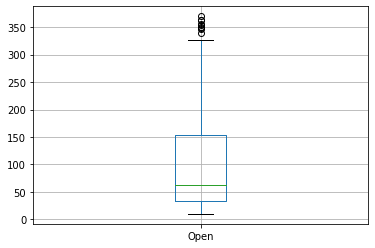

In [39]:
Dataset.boxplot('Open')

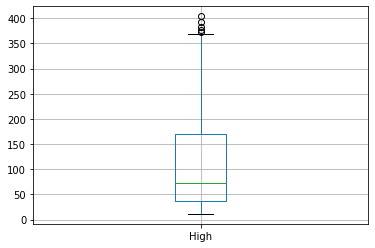

In [40]:
Dataset.boxplot('High')

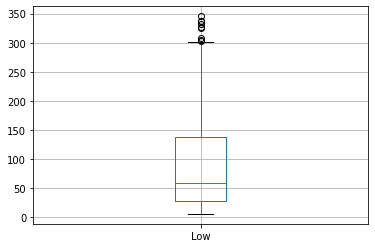

In [42]:
Dataset.boxplot('Low')

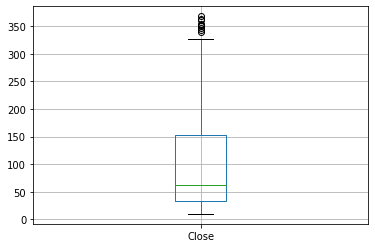

In [44]:
Dataset.boxplot('Close')

# **Exploratory Data Analysis**

**Dependent variable of close price of stock**

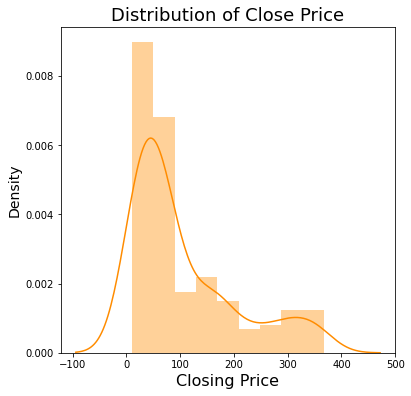

In [57]:
# depndent variable is 'Close'
# Normal Distribution

plt.figure(figsize = (6,6))
sns.distplot(Dataset['Close'], color = 'DarkOrange')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It is Right Skewed Distirbution

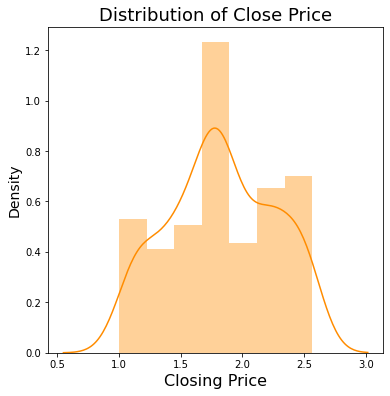

In [58]:
# Distribution plot of closing price For applying log transformation
plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['Close']), color = 'DarkOrange')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


**Independent Variable Open , High and Low price of stock**

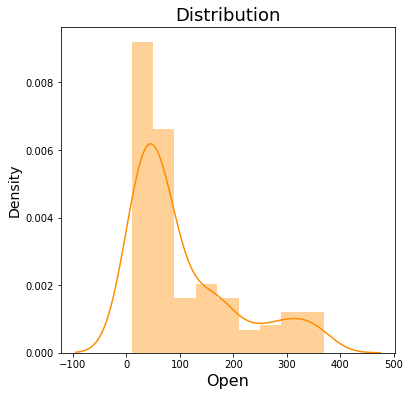

In [59]:
# plotting distribution for Each Features
# for Normal Distribution
# ploting for Distribution of ope

plt.figure(figsize = (6,6))
sns.distplot(Dataset['Open'], color = 'DarkOrange')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


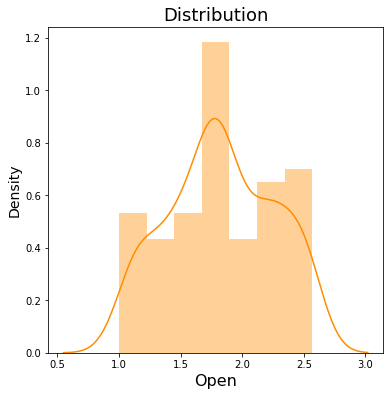

In [60]:
plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['Open']), color = 'DarkOrange')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()